### Import Libraries

In [ ]:
#!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\Oumaima Toufali\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#!pip install transformers


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\Oumaima Toufali\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout,Input, Attention,GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
import seaborn as sns
from tensorflow.keras.models import Model

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

ModuleNotFoundError: No module named 'pandas'

# 1- Data Preparation

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ChatGPT_Reviews.csv to ChatGPT_Reviews.csv


In [ ]:
# Charger le dataset
data = pd.read_csv('ChatGPT_Reviews.csv')

In [ ]:
data.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,8/23/2024 19:30
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,8/23/2024 19:28
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,8/23/2024 19:22
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,8/23/2024 19:20
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,8/23/2024 19:20


In [ ]:
data.tail()

,Review Id,Review,Ratings,Review Date
196722,462686ff-e500-413c-a6b4-2badc2e3b21d,Update 2023,5,7/27/2023 16:26
196723,f10e0d48-ecb6-42db-b103-46c0046f9be9,its grear,5,9/23/2023 16:25
196724,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Funtastic App,5,11/8/2023 13:57
196725,abe43878-973f-4e96-a765-c4af5c7f7b20,hi all,5,7/25/2023 15:32
196726,0151001d-b81c-41b5-8927-f56738989625,expert application,5,11/30/2023 18:11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
data.shape

(196727, 4)

In [ ]:

df = data.iloc[:7000]

In [ ]:
df.shape

(1000, 4)

In [ ]:
df.dtypes

,0
Review Id,object
Review,object
Ratings,int64
Review Date,object


In [ ]:
df.isnull().sum()

,0
Review Id,0
Review,0
Ratings,0
Review Date,0


##### Dealing with the missing values

In [ ]:
# dropping the rows with content missing values
df.dropna(subset = ['Review'],inplace=True)

<ipython-input-15-2dfcee703e2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ['Review'],inplace=True)


In [ ]:
# Count the total number of duplicate rows
total_duplicates = df[df.duplicated(keep='first')].shape[0]

print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 0


#### Drop the duplicated rows

In [ ]:
# Drop duplicate rows
df.drop_duplicates(keep='first', inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

<ipython-input-17-7b62c4225847>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


In [ ]:
df.shape

(1000, 4)

In [ ]:
df['Review']

,Review
0,good
1,good
2,nice app
3,"nice, ig"
4,"this is a great app, the bot is so accurate to..."
...,...
995,doesn't work
996,Thes is best app in the world
997,এত দিনে মনের মতো একটা App পেলাম
998,Nice


In [ ]:
df.Review.unique()

array(['good', 'nice app', 'nice, ig',
       "this is a great app, the bot is so accurate to anything, it gives me tips, in gaming, studies, and life, etc. This app is also helpful if you were having problems in things! also there are some problems, about the server glitch, but don't worry, some glitches are just seconds, overall a great app. note: the GPT-4o is more powerful, and accurate than the regular one.",
       'so nice app', 'just love this app, or guy', 'great app',
       'Very impressive',
       'helps with coding a lot this ai is great for everyone',
       'I am not very happy with this because chatgpt answers the questions I ask but it stops midway. Then even after continuous efforts it does not give complete answer. This is not very correct.Please fix it so that there is no more trouble. This is a very wrong thing, after some use you are asked to upgrade which is very expensive.😔☹️',
       'best ❤️\u200d🩹❤️\u200d🩹', 'nice', 'I love GPT-4o mini',
       'its the best

## Exploratory Data Analysis

#### Reviews distribution

<ipython-input-21-f4556fa11a43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Review_Length"] = df["Review"].astype(str).apply(len)


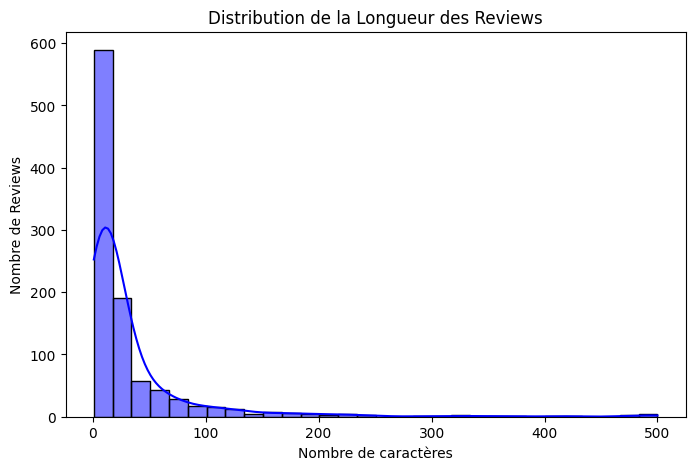

In [ ]:
df["Review_Length"] = df["Review"].astype(str).apply(len)

# Histogramme des longueurs de reviews
plt.figure(figsize=(8,5))
sns.histplot(df["Review_Length"], bins=30, kde=True, color="blue")
plt.title("Distribution de la Longueur des Reviews")
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre de Reviews")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


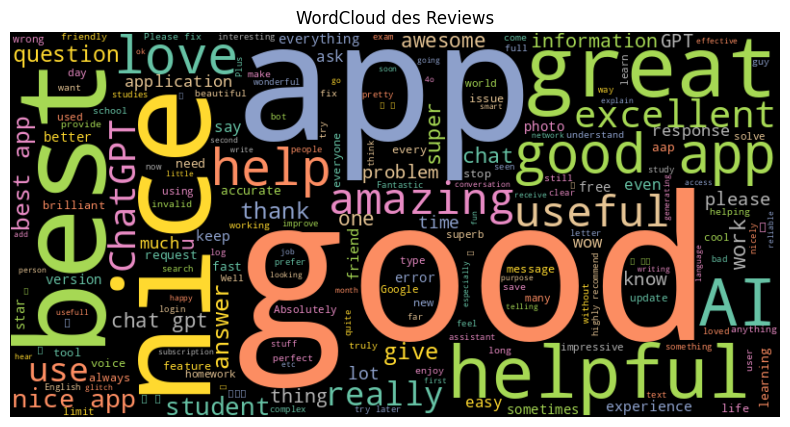

In [ ]:
from wordcloud import WordCloud

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Fusionner tous les commentaires
all_words = " ".join(df["Review"].dropna())

# Nettoyage des mots communs et stopwords
words = " ".join([word for word in all_words.split() if word.lower() not in stop_words])

# Générer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Set2").generate(words)

# Afficher le WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud des Reviews")
plt.show()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-33-444825184c26>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Fréquence", y="Mot", data=word_freq_df, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


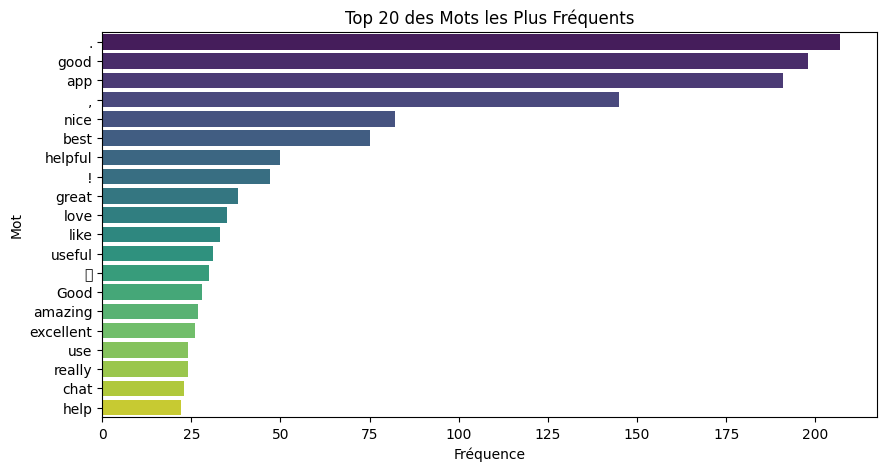

In [ ]:
import nltk
nltk.download('punkt_tab') # Download the 'punkt_tab' resource
from collections import Counter
from nltk.tokenize import word_tokenize



# Tokenization et comptage des mots
words = word_tokenize(words)
word_freq = Counter(words)

# Convertir en DataFrame pour affichage
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=["Mot", "Fréquence"])

# Affichage sous forme de barplot
plt.figure(figsize=(10,5))
sns.barplot(x="Fréquence", y="Mot", data=word_freq_df, palette="viridis")
plt.title("Top 20 des Mots les Plus Fréquents")
plt.show()

## Text Analysis with NLP Preprocessing

### Text Cleaning & Preprocessing

Les étapes incluent :

Conversion en minuscules

Suppression des caractères spéciaux et ponctuation

Suppression des nombres

Suppression des mots vides (stopwords)

Lemmatisation (réduction des mots à leur forme de base)

In [ ]:
# Téléchargement des ressources NLP nécessaires
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
# Initialisation du lemmatizer et des stopwords
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
# Fonction de nettoyage
def clean_text(text):
    if isinstance(text, str):  # Vérifier si le texte est une chaîne de caractères
        text = text.lower()  # Convertir en minuscules
        text = re.sub(r"\d+", "", text)  # Supprimer les nombres
        text = text.translate(
            str.maketrans("", "", string.punctuation)
        )  # Supprimer la ponctuation
        words = word_tokenize(text)  # Tokenization
        words = [
            lemmatizer.lemmatize(word) for word in words if word not in stop_words
        ]  # Stopwords & lemmatisation
        return " ".join(words)
    else:
        return ""
# Appliquer le nettoyage à la colonne Review
df["Cleaned_Review"] = df["Review"].apply(clean_text)
df = df[
    df["Cleaned_Review"].str.strip() != "" ]  # Supprimer les reviews vides après nettoyage
# Affichage des 5 premières lignes
print(df[["Review", "Cleaned_Review"]].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                              Review  \
0                                               good   
1                                               good   
2                                           nice app   
3                                           nice, ig   
4  this is a great app, the bot is so accurate to...   

                                      Cleaned_Review  
0                                               good  
1                                               good  
2                                           nice app  
3                                            nice ig  
4  great app bot accurate anything give tip gamin...  


<ipython-input-34-02ae7484f8a3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Review'] = df['Review'].apply(clean_text)


### Encodage des Labels pour Classification

Nous allons transformer les ratings (1-5) en 3 catégories pour une classification multi-classes :

0 → Négatif (1 & 2 étoiles)

1 → Neutre (3 étoiles)

2 → Positif (4 & 5 étoiles)

<ipython-input-35-78a95999c383>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"] = df["Ratings"].apply(encode_sentiment)


<Axes: title={'center': 'Distribution des Sentiments'}, xlabel='Sentiment'>

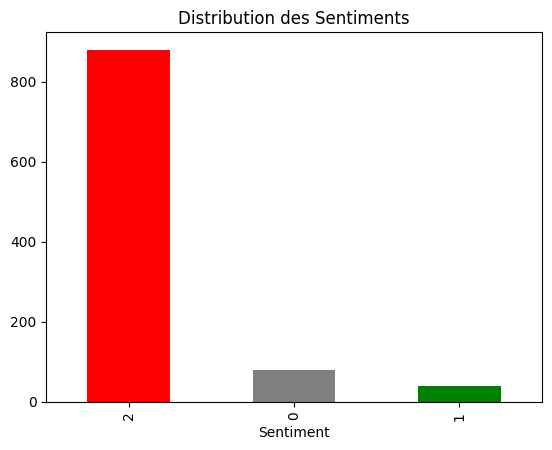

In [ ]:
def encode_sentiment(rating):
    if rating <= 2:
        return 0  # Négatif
    elif rating == 3:
        return 1  # Neutre
    else:
        return 2  # Positif

df["Sentiment"] = df["Ratings"].apply(encode_sentiment)

# Vérification de la répartition des classes
df["Sentiment"].value_counts().plot(kind="bar", color=["red", "gray", "green"], title="Distribution des Sentiments")


## Model training and evaluation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["Cleaned_Review"], df["Sentiment"], test_size=0.2, random_state=42, stratify=df["Sentiment"])
 

### Feature Extraction (Vectorization) :Tokenization & Padding for Deep Learning Models

In [ ]:
from tensorflow.keras.utils import to_categorical
# Initialisation du Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Conversion en séquences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding des séquences
max_length = 50
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding="post")
# Correction : Encodage one-hot des labels
num_classes = 3
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot  = to_categorical(y_test, num_classes=num_classes)


# 2- Modélisation NLP avec RNN, LSTM et GRU

# - Ajout du Mécanisme d'Attention

## RNN avec mechanisme d'attention

In [ ]:

# Définition des entrées
inputs = Input(shape=(50,))  # 50 = MAX_SEQUENCE_LENGTH

# Embedding
embedding = Embedding(10000, 128, input_length=50)(inputs)

# RNN
rnn_output = SimpleRNN(64, return_sequences=True)(embedding)

# Ajout du Mécanisme d'Attention
query = Dense(64)(rnn_output)  # Transformation en Query
attention = Attention()([query, rnn_output])  # Application de l'attention

# Global Average Pooling pour condenser l'information
context_vector = GlobalAveragePooling1D()(attention)

# Couche de classification (déjà présente)
output = Dense(3, activation="softmax")(context_vector)

# Définition du modèle final
model_rnn_attention = Model(inputs, output)

# Compilation du modèle
model_rnn_attention.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Affichage du résumé du modèle
model_rnn_attention.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 50, 128)        │      1,280,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_1 (SimpleRNN)  │ (None, 50, 64)         │         12,352 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 50, 64)         │          4,160 │ simple_rnn_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 50, 64)         │              0 │ dense_3[0][0],         │
│                           │                        │                │ simple_rnn_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 64)             │              0 │ attention[0][0]        │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 3)              │            195 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,296,707 (4.95 MB)

 Trainable params: 1,296,707 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f"\n🔹 Entraînement du modèle RNN avec la couche d'attention ..........")
model_rnn_attention.fit(X_train_padded, y_train_onehot, epochs=10, batch_size=32)



🔹 Entraînement du modèle RNN avec la couche d'attention ..........
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7732 - loss: 0.5569
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8872 - loss: 0.4167
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8837 - loss: 0.4212
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8955 - loss: 0.3830
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9063 - loss: 0.3442
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9270 - loss: 0.2436
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9151 - loss: 0.2666
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9214 - loss: 0.2257
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9404 - loss: 0.1806
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9465 - loss: 0.1717


In [ ]:
loss, accuracy = model_rnn_attention.evaluate(X_test_padded, y_test_onehot)
print(f" Test Accuracy: {accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8626 - loss: 0.5405  
Test Accuracy: 86.50%


In [ ]:
predictions = model_rnn_attention.predict(X_test_padded)
predicted_labels = predictions.argmax(axis=1)
true_labels = y_test_onehot.argmax(axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:

print(classification_report(true_labels, predicted_labels))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.22      0.12      0.16        16
           1       0.00      0.00      0.00         8
           2       0.90      0.97      0.93       176

    accuracy                           0.86       200
   macro avg       0.37      0.37      0.36       200
weighted avg       0.81      0.86      0.83       200



## LSTM avec mechanisme d'attention

In [ ]:

# Définition des entrées
inputs = Input(shape=(50,))  # 50 = MAX_SEQUENCE_LENGTH

# Embedding
embedding = Embedding(10000, 128, input_length=50)(inputs)

# LSTM
lstm_output = LSTM(64, return_sequences=True)(embedding)

# Ajout du Mécanisme d'Attention
query = Dense(64)(lstm_output)  # Transformation en Query
attention = Attention()([query, lstm_output])  # Application de l'attention

# Global Average Pooling pour condenser l'information
context_vector = GlobalAveragePooling1D()(attention)

# Couche de classification (déjà présente)
output = Dense(3, activation="softmax")(context_vector)

# Définition du modèle final
model_lstm_attention = Model(inputs, output)

# Compilation du modèle
model_lstm_attention.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Affichage du résumé du modèle

model_lstm_attention.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 50, 128)        │      1,280,000 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 50, 64)         │         49,408 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 50, 64)         │          4,160 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_1 (Attention)   │ (None, 50, 64)         │              0 │ dense_5[0][0],         │
│                           │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ attention_1[0][0]      │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 3)              │            195 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,333,763 (5.09 MB)

 Trainable params: 1,333,763 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f"\n🔹 Entraînement du modèle LSTM avec la couche d'attention ..........")
history = model_lstm_attention.fit(
    X_train_padded, y_train_onehot, batch_size=32, epochs=10
)


🔹 Entraînement du modèle LSTM avec la couche d'attention ..........
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7766 - loss: 0.6448 - val_accuracy: 0.8800 - val_loss: 0.4344
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8773 - loss: 0.4248 - val_accuracy: 0.8800 - val_loss: 0.4308
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8797 - loss: 0.4194 - val_accuracy: 0.8800 - val_loss: 0.4258
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8742 - loss: 0.3936 - val_accuracy: 0.8750 - val_loss: 0.4229
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9032 - loss: 0.3147 - val_accuracy: 0.8750 - val_loss: 0.4528
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9184 - loss: 0.2582 - val_accuracy: 0.8800 - val_loss: 0.4363
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9331 - loss: 0.1884 - val_accuracy: 0.8750 - val_loss: 0.4578
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3

In [ ]:
#evaluation de modele
loss, accuracy = model_lstm_attention.evaluate(X_test_padded, y_test_onehot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8604 - loss: 0.4905
Test Accuracy: 86.50%


In [ ]:
#faire les prédictions
predictions = model_lstm_attention.predict(X_test_padded)
predicted_labels = predictions.argmax(axis=1)  # Convert softmax probabilities to class labels

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
print(classification_report(y_test_onehot.argmax(axis=1), predicted_labels))


              precision    recall  f1-score   support

           0       0.14      0.06      0.09        16
           1       0.00      0.00      0.00         8
           2       0.89      0.98      0.93       176

    accuracy                           0.86       200
   macro avg       0.34      0.35      0.34       200
weighted avg       0.80      0.86      0.83       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## GRU avec mechanisme d'attention

In [ ]:

# Définition des entrées
inputs = Input(shape=(50,))  # 50 = MAX_SEQUENCE_LENGTH

# Embedding
embedding = Embedding(10000, 128, input_length=50)(inputs)

# GRU
gru_output = GRU(64, return_sequences=True)(embedding)

# Ajout du Mécanisme d'Attention
query = Dense(64)(gru_output)  # Transformation en Query
attention = Attention()([query, gru_output])  # Application de l'attention

# Global Average Pooling pour condenser l'information
context_vector = GlobalAveragePooling1D()(attention)

# Couche de classification (déjà présente)
output = Dense(3, activation="softmax")(context_vector)

# Définition du modèle final
model_gru_attention = Model(inputs, output)

# Compilation du modèle
model_gru_attention.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Affichage du résumé du modèle
model_gru_attention.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 50, 128)        │      1,280,000 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 50, 64)         │         37,248 │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 50, 64)         │          4,160 │ gru_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_2 (Attention)   │ (None, 50, 64)         │              0 │ dense_7[0][0],         │
│                           │                        │                │ gru_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ attention_2[0][0]      │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 3)              │            195 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,321,603 (5.04 MB)

 Trainable params: 1,321,603 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_gru_attention.fit(X_train_padded, y_train_onehot, epochs=10, batch_size=32)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7541 - loss: 0.6256
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8719 - loss: 0.4384
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8674 - loss: 0.4365
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8873 - loss: 0.3787
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8976 - loss: 0.2847
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9225 - loss: 0.2518
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9255 - loss: 0.2326
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9443 - loss: 0.1571
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9398 - loss: 0.1584
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9352 - loss: 0.1743


In [ ]:
loss, accuracy = model_gru_attention.evaluate(X_test_padded, y_test_onehot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8466 - loss: 0.6514
Test Accuracy: 85.50%


In [ ]:
predictions = model_gru_attention.predict(X_test_padded)
predicted_labels = predictions.argmax(axis=1)
true_labels = y_test_onehot.argmax(axis=1)
print(classification_report(true_labels, predicted_labels))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
              precision    recall  f1-score   support

           0       0.11      0.06      0.08        16
           1       0.00      0.00      0.00         8
           2       0.89      0.97      0.93       176

    accuracy                           0.85       200
   macro avg       0.33      0.34      0.34       200
weighted avg       0.79      0.85      0.82       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 4- Modélisation avec Transformers

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW, get_scheduler

# Initialisation du Tokenizer BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
def encode_texts(texts, max_length=50):
    return tokenizer(texts.tolist(), padding="max_length", truncation=True, max_length=max_length, return_tensors="pt")

X_train_encoded = encode_texts(X_train)
X_test_encoded = encode_texts(X_test)

y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)


In [ ]:
# Création du DataLoader
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

train_dataset = SentimentDataset(X_train_encoded, y_train_tensor)
test_dataset = SentimentDataset(X_test_encoded, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Chargement du modèle BERT pour classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

#Optimisation avec AdamW
optimizer = AdamW(model.parameters(), lr=2e-5)

# Scheduler pour un Learning Rate Adaptatif
num_training_steps = len(train_loader) * 3  # 3 epochs
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)
 
# Entraînement du modèle
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

epochs = 3
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
    print(f"Epoch {epoch + 1} terminé.")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1 terminé.
Epoch 2 terminé.
Epoch 3 terminé.


In [ ]:
# Évaluation
# Mise en mode évaluation
model.eval()

all_preds = []
all_labels = [] 

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        predictions = torch.argmax(outputs.logits, dim=-1)

        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(batch["labels"].cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)

print(f"\n✅ Précision finale : {accuracy * 100:.2f}%")


✅ Précision finale : 87.50%



🔍 Rapport de classification :

              precision    recall  f1-score   support

    Classe 0       0.00      0.00      0.00        16
    Classe 1       0.00      0.00      0.00         8
    Classe 2       0.88      0.99      0.93       176

    accuracy                           0.88       200
   macro avg       0.29      0.33      0.31       200
weighted avg       0.77      0.88      0.82       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


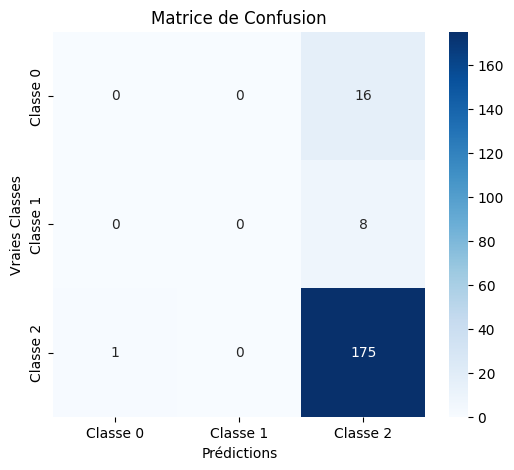

In [ ]:
# Rapport de classification (Precision, Recall, F1-score)
print("\n🔍 Rapport de classification :\n")
print(classification_report(all_labels, all_preds, target_names=["Classe 0", "Classe 1", "Classe 2"]))

# Matrice de confusion
conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1", "Classe 2"], yticklabels=["Classe 0", "Classe 1", "Classe 2"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.title("Matrice de Confusion")
plt.show()